In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Create features (e.g., usage patterns, contract details, etc.)
usage = np.random.uniform(0, 100, num_samples)
contract_length = np.random.choice([1, 2, 3], num_samples)
monthly_charges = np.random.uniform(20, 100, num_samples)

# Create a binary target variable (churn) - 0 for no churn, 1 for churn
churn_probabilities = 1 / (1 + np.exp(-(0.1 * usage + 0.2 * contract_length + 0.3 * monthly_charges)))
churn_labels = np.random.binomial(1, churn_probabilities)

# Create a DataFrame to hold the synthetic data
data = pd.DataFrame({
    'Usage': usage,
    'Contract_Length': contract_length,
    'Monthly_Charges': monthly_charges,
    'Churn': churn_labels
})

# Explore the synthetic data
data.head()


,Usage,Contract_Length,Monthly_Charges,Churn
0,37.454012,3,99.372641,1
1,95.071431,2,88.113997,1
2,73.199394,3,36.680841,1
3,59.865848,3,94.447617,1
4,15.601864,1,29.309312,1


In [4]:
# Display basic statistics of the data
data.describe()

# Create visualizations to understand the data
# Example: data['Churn'].value_counts().plot(kind='bar')


,Usage,Contract_Length,Monthly_Charges,Churn
count,1000.000000,1000.000000,1000.000000,1000.0
mean,49.025655,1.975000,59.994199,1.0
std,29.213736,0.810575,23.112784,0.0
min,0.463202,1.000000,20.010775,1.0
25%,23.597327,1.000000,40.730222,1.0
50%,49.680738,2.000000,60.127614,1.0
75%,74.431959,3.000000,80.284913,1.0
max,99.971767,3.000000,99.867801,1.0


<Axes: >

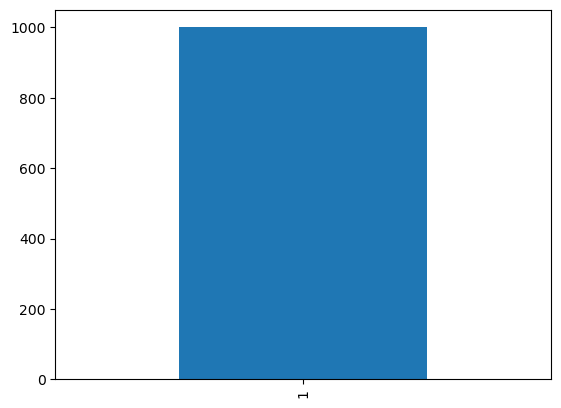

In [5]:
data['Churn'].value_counts().plot(kind='bar')

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Fill missing values with the mean
data = data.fillna(data.mean())


In [7]:
# Assuming 'Contract_Length' is a categorical variable
data = pd.get_dummies(data, columns=['Contract_Length'], drop_first=True)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Usage', 'Monthly_Charges']] = scaler.fit_transform(data[['Usage', 'Monthly_Charges']])


In [9]:
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create the model 
clf = RandomForestClassifier(random_state=42)

# Train (fit) the model on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[200]]
